In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('../data/pubg-finish-placement-prediction/train_V2.csv')

In [3]:
#首行
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
#尾行
train.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [5]:
#train描述数据
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [7]:
'''
杀敌-DBNOs - Number of enemy players knocked.
辅助-assists - Number of enemy players this player damaged that were killed by teammates.
道具-boosts - Number of boost items used.
总伤害-damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
爆头-headshotKills - Number of enemy players killed with headshots.
治疗-heals - Number of healing items used.
用户ID-Id - Player’s Id
屠杀榜排位-killPlace - Ranking in match of number of enemy players killed.
屠杀点数-killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
连杀数-killStreaks - Max number of enemy players killed in a short amount of time.
杀死数-kills - Number of enemy players killed.
最远屠杀- longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
游戏时间-matchDuration - Duration of match in seconds.
匹配ID-matchId - ID to identify match. There are no matches that are in both the training and testing set.
匹配方式-matchType - 标准模式为“单人”、“双人”、“Squad”、“单人fpp”、“双人fpp”和“Squad fpp”；其他模式来自活动或自定义比赛,String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
复活队友的次数-revives - Number of times this player revived teammates.
驾车举例-rideDistance - Total distance traveled in vehicles measured in meters.
驾车杀数-roadKills - Number of kills while in a vehicle.
游泳距离-swimDistance - Total distance traveled by swimming measured in meters.
友方误伤数-teamKills - Number of times this player killed a teammate.
车辆损坏数-vehicleDestroys - Number of vehicles destroyed.
步行距离-walkDistance - Total distance traveled on foot measured in meters.
捡武器数-weaponsAcquired - Number of weapons picked up.
winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
小组ID-groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
小组数量-numGroups - Number of groups we have data for in the match.
最差放置位置-maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
胜率预测-winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.
'''



'\n杀敌-DBNOs - Number of enemy players knocked.\n辅助-assists - Number of enemy players this player damaged that were killed by teammates.\n道具-boosts - Number of boost items used.\n总伤害-damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.\n爆头-headshotKills - Number of enemy players killed with headshots.\n治疗-heals - Number of healing items used.\n用户ID-Id - Player’s Id\n屠杀榜排位-killPlace - Ranking in match of number of enemy players killed.\n屠杀点数-killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.\n连杀数-killStreaks - Max number of enemy players killed in a short amount of time.\n杀死数-kills - Number of enemy players killed.\n最远屠杀- longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.\n

In [8]:
## 数据清洗
## 删除胜率预测的空数据
train[train['winPlacePerc'].isnull()]
##删除此行
train.drop(2744604,inplace=True)

In [9]:
train[train['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


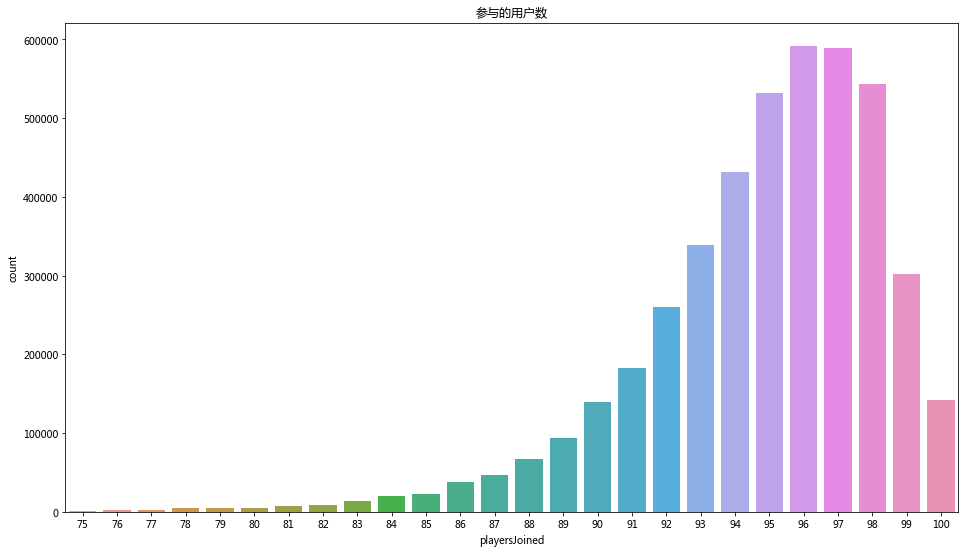

In [10]:
## 参与的用户数，去重后
train['playersJoined']=train.groupby('matchId')['matchId'].transform('count')
plt.figure(figsize=(16,9))
sns.countplot(train[train['playersJoined']>=75]['playersJoined'])
plt.title('参与的用户数')
plt.show()
## 大部分的比赛中参与的用户接近100人


In [11]:
##归一化处理数据
## 杀敌的数量
train['killNorm']=train['kills']*((100-train['playersJoined'])/100 +1)
## 放置位置
train['maxPlaceNorm']=train['maxPlace']*((100-train['playersJoined'])/100 +1)
## 匹配时间
train['matchDurationNorm']=train['matchDuration']*((100-train['playersJoined'])/100 +1)
##伤害
train['damageDealtNorm']=train['damageDealt']*((100-train['playersJoined'])/100 +1)
## 赋值给to_show，用于展示数据
to_show = ['Id','kills','killNorm','damageDealt','damageDealtNorm','maxPlace','maxPlaceNorm','matchDuration','matchDurationNorm']

##显示在数据中
train[to_show][0:11]


,Id,kills,killNorm,damageDealt,damageDealtNorm,maxPlace,maxPlaceNorm,matchDuration,matchDurationNorm
0,7f96b2f878858a,0,0.00,0.000,0.00000,28,29.12,1306,1358.24
1,eef90569b9d03c,0,0.00,91.470,99.70230,26,28.34,1777,1936.93
2,1eaf90ac73de72,0,0.00,68.000,69.36000,50,51.00,1318,1344.36
3,4616d365dd2853,0,0.00,32.900,35.86100,31,33.79,1436,1565.24
4,315c96c26c9aac,1,1.03,100.000,103.00000,97,99.91,1424,1466.72
5,ff79c12f326506,1,1.05,100.000,105.00000,28,29.40,1395,1464.75
6,95959be0e21ca3,0,0.00,0.000,0.00000,28,28.84,1316,1355.48
7,311b84c6ff4390,0,0.00,8.538,8.87952,96,99.84,1967,2045.68
8,1a68204ccf9891,0,0.00,51.600,53.14800,28,28.84,1375,1416.25
9,e5bb5a43587253,0,0.00,37.270,38.38810,29,29.87,1930,1987.90


In [12]:
##新增加一个参数：道具和治疗

train['healandboosts']= train['heals']+train['boosts']
train[['heals','boosts','healandboosts']].tail()

,heals,boosts,healandboosts
4446961,0,0,0
4446962,0,1,1
4446963,0,0,0
4446964,2,4,6
4446965,1,2,3


In [13]:
## 抓出作弊者
## 骑车、走路、游泳距离为零，但是杀人不为零的剔除

train['totalDistance'] = train['rideDistance']+train['walkDistance']+train['swimDistance']
train['killWithoutMoving']=(train['totalDistance'] ==0 & (train['kills']>0))



In [14]:
train[train['killWithoutMoving']== True].head(10)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,playersJoined,killNorm,maxPlaceNorm,matchDurationNorm,damageDealtNorm,healandboosts,totalDistance,killWithoutMoving
29,ac5b57ff39979c,857cc55b2b6001,e019e04dee4f19,0,0,0.0,0,0,0,87,...,0,0.0000,92,0.0,49.68,1652.40,0.0,0,0.0,True
116,6adb021f5165ff,58e5500bd40898,de5c692fe25a73,0,0,0.0,0,0,0,68,...,847,0.0000,74,0.0,51.66,1781.64,0.0,0,0.0,True
151,a2bbe20aa8789d,926e8a09bab249,e36e4203ed4831,0,0,0.0,0,0,0,92,...,765,0.0000,95,0.0,50.40,1445.85,0.0,0,0.0,True
237,baaa694658e085,d034728f22cff7,fa71620624d3e7,0,0,0.0,0,0,0,94,...,1510,0.0000,97,0.0,29.87,1398.74,0.0,0,0.0,True
283,3ab8128e6bcbe6,bb52a209f2e938,aabd2650b129e2,0,0,0.0,0,0,0,84,...,0,0.1277,95,0.0,50.40,1886.85,0.0,0,0.0,True
404,ab33fe5e5c9fb8,a9a82e992fb212,3122bae9aa21f7,0,0,0.0,0,0,0,90,...,0,0.0000,93,0.0,51.36,1526.89,0.0,0,0.0,True
520,5c654ee06cb3e5,2b3a65fd9039d9,99407bcde7569c,0,0,0.0,0,0,0,91,...,0,0.0000,93,0.0,99.51,1997.69,0.0,0,0.0,True
606,ae1a75a25368a7,1802036181a177,4aba049c347429,0,0,0.0,0,0,0,94,...,0,0.0000,97,0.0,51.50,1850.91,0.0,0,0.0,True
619,30131ea60bc193,12332138d02c6b,df5f61d4578df0,0,0,0.0,0,0,0,90,...,0,0.0000,91,0.0,99.19,1408.28,0.0,0,0.0,True
638,604d3aa575de95,716c7e34c44f21,3b8b7b63decaf5,0,0,0.0,0,0,0,90,...,1504,0.0000,92,0.0,99.36,2034.72,0.0,0,0.0,True


In [15]:
display(train[train['killWithoutMoving']== True].shape)

(97369, 37)

In [16]:
## 处理这部分不动的用户
train.drop(train[train['killWithoutMoving']== True].index,inplace = True)


In [17]:
# 找出爆头率较高用户
train['headshot_rate'] = train['headshotKills']/train['kills']
## 空值填0
train['headshot_rate'] = train['headshot_rate'].fillna(0)

In [18]:
# 找出车内刺杀超过10人
train[train['roadKills']>10]


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killNorm,maxPlaceNorm,matchDurationNorm,damageDealtNorm,healandboosts,totalDistance,killWithoutMoving,headshot_rate
2733926,c3e444f7d1289f,489dd6d1f2b3bb,4797482205aaa4,0,0,1246.0,0,0,0,1,...,0.4286,92,15.12,99.36,1572.48,1345.68,0,1282.302,False,0.000000
2767999,34193085975338,bd7d50fa305700,a22354d036b3d6,0,0,1102.0,0,0,0,1,...,0.4713,88,12.32,98.56,2179.52,1234.24,0,4934.600,False,0.000000
2890740,a3438934e3e535,1081c315a80d14,fe744430ac0070,0,8,2074.0,0,1,11,1,...,1.0000,38,32.40,61.56,3191.40,3359.88,19,5876.000,False,0.050000
3524413,9d9d044f81de72,8be97e1ba792e3,859e2c2db5b125,0,3,1866.0,0,5,7,1,...,0.9398,84,20.88,97.44,2233.00,2164.56,10,7853.000,False,0.277778


In [19]:
#定位到5米，杀14人的开挂选手，删
train.drop(train[train['roadKills']>10].index, inplace = True)


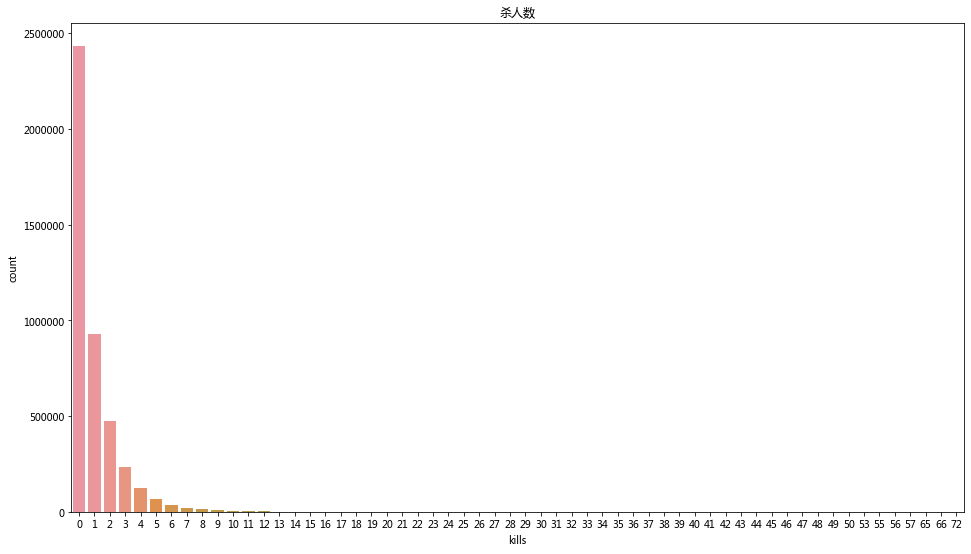

In [20]:
## 查看每个用户的杀人数
plt.figure(figsize = (16,9))
sns.countplot(data = train,x = train['kills'])
plt.title('杀人数')
plt.show()

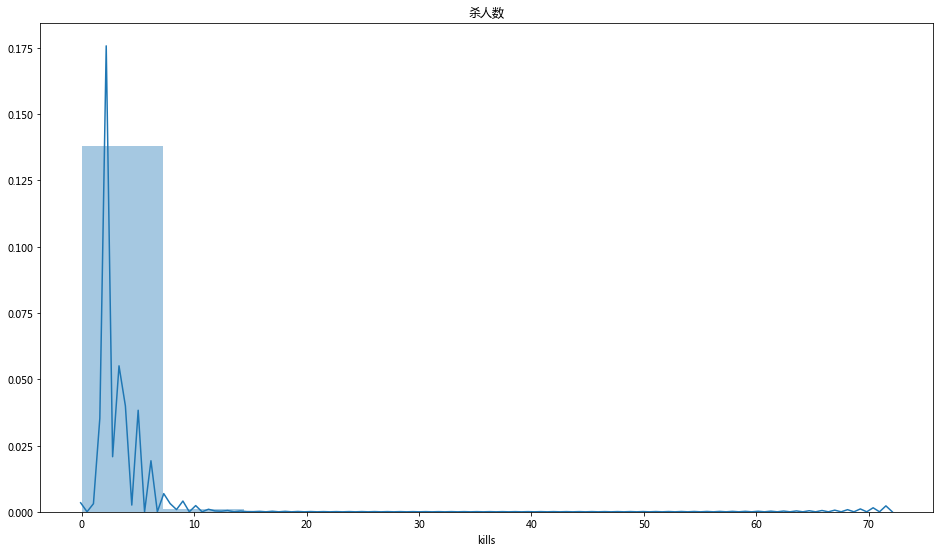

In [21]:
## 查看杀人数的高斯分布
plt.figure(figsize = (16,9))
sns.distplot(train['kills'],bins =10)
plt.title('杀人数')
plt.show()

In [22]:
##部分放大30杀的用户 ==95行
display(train[train['kills']>30].shape)
train[train['kills']>30].head(10)


(95, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killNorm,maxPlaceNorm,matchDurationNorm,damageDealtNorm,healandboosts,totalDistance,killWithoutMoving,headshot_rate
57978,9d8253e21ccbbd,ef7135ed856cd8,37f05e2a01015f,9,0,3725.0,0,7,0,2,...,0.8571,16,64.40,14.72,3308.32,6854.00,0,48.82,False,0.200000
87793,45f76442384931,b3627758941d34,37f05e2a01015f,8,0,3087.0,0,8,27,3,...,1.0000,16,57.04,14.72,3308.32,5680.08,27,780.70,False,0.258065
156599,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5479.0,0,12,7,4,...,0.7000,11,90.72,20.79,3398.22,10355.31,7,23.71,False,0.250000
160254,15622257cb44e2,1a513eeecfe724,db413c7c48292c,1,0,4033.0,0,40,0,1,...,1.0000,62,57.96,11.04,1164.72,5565.54,0,718.30,False,0.952381
180189,1355613d43e2d0,f863cd38c61dbf,39c442628f5df5,5,0,3171.0,0,6,15,1,...,1.0000,11,66.15,17.01,3394.44,5993.19,15,71.51,False,0.171429
334400,810f2379261545,7f3e493ee71534,f900de1ec39fa5,20,0,6616.0,0,13,5,1,...,1.0000,11,122.85,20.79,3398.22,12504.24,5,1036.00,False,0.200000
353128,f3e9746e3ff151,4bc1f00f07b304,a9e84c456cc859,2,0,3834.0,0,9,5,1,...,1.0000,13,72.93,24.31,3356.65,7169.58,5,124.20,False,0.230769
457829,265e23756baa0b,9d94424171c2a1,664dee9ed8f646,3,0,2907.0,0,27,2,1,...,1.0000,38,53.46,8.10,1339.74,4709.34,2,382.40,False,0.818182
488335,31a0682922ef45,275a27a3ee4cc8,3037f74ef8a3a3,2,0,3055.0,0,9,0,1,...,1.0000,20,59.40,32.40,1605.60,5499.00,0,35.30,False,0.272727
662650,dd424a8b74bd49,ac9dea6d62f2e6,8a728def0644be,9,0,3454.0,38,9,4,1,...,0.2308,54,49.64,20.44,1749.08,5042.84,4,111.10,False,0.264706


In [23]:
## 将30杀以上的用户去除
train.drop(train[train['kills']>30].index,inplace = True)

##train.drop(train[train['roadKills']>10].index, inplace = True)

In [24]:
display(train[train['kills']>30].shape)

(0, 38)

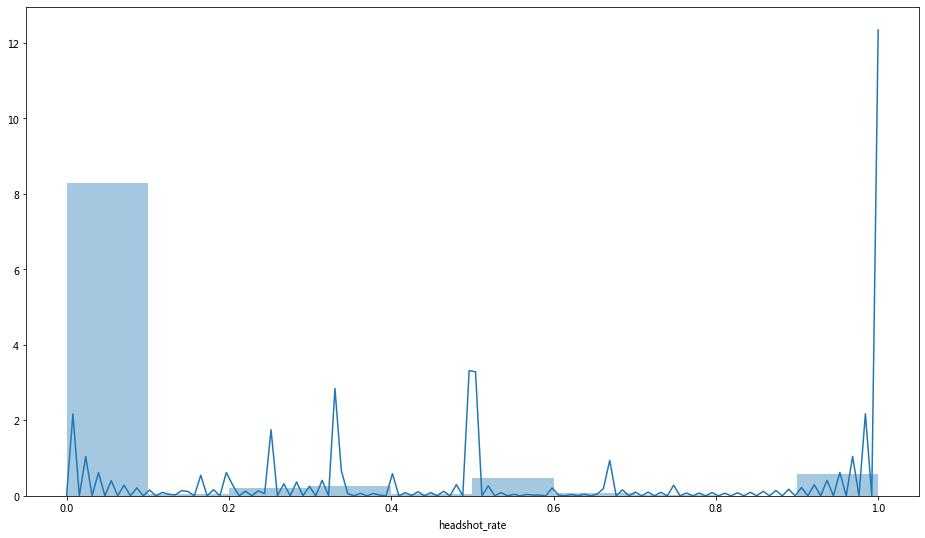

In [25]:
## 100%爆头率的异常数据
plt.figure(figsize=(16,9))
sns.distplot(train['headshot_rate'],bins = 10)
plt.show()

In [26]:
## 10杀且100%爆头率的异常数据 = 24行
display(train[train['kills']>9 &(train['headshot_rate']==1)].shape)
train[train['kills']>9 &(train['headshot_rate']==1)].head(10)

(1697177, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killNorm,maxPlaceNorm,matchDurationNorm,damageDealtNorm,healandboosts,totalDistance,killWithoutMoving,headshot_rate
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.1875,97,1.03,99.91,1466.72,103.0000,0,49.75,False,0.000000
13,b7807186e3f679,3c08e461874749,2c30ddf481c52d,0,1,324.20,0,1,5,5,...,0.8750,97,4.12,99.91,1942.58,333.9260,6,3354.84,False,0.250000
14,8e244ac61b6aab,d40d0c7d3573a1,94e1c1cc443c65,0,1,122.80,1,0,2,25,...,0.9000,93,1.07,33.17,1560.06,131.3960,3,2963.29,False,0.000000
16,62f2f0917d84b2,f61b698274d9f5,1d6cfe0f6f23b0,0,2,81.71,1,0,14,25,...,0.7308,98,1.02,27.54,1919.64,83.3442,16,4193.90,False,0.000000
17,92022479b92ce7,2f2c33f548c4b9,07948d723b9c0f,0,3,254.30,0,0,12,13,...,0.8211,96,2.08,99.84,1425.84,264.4720,15,4169.29,False,0.000000
20,02ace8c6e58461,a4bc548028f800,80f2b8448e474b,0,4,269.10,0,1,8,18,...,0.6383,95,2.10,50.40,1984.50,282.5550,12,4528.00,False,0.500000
22,9b2961d4d51f91,799d0a4d61dc3c,e833ca2282169d,0,1,192.30,1,2,3,15,...,0.7500,97,2.06,50.47,1828.25,198.0690,4,3596.00,False,1.000000
23,0b6fbdfb59c994,7a75c3e86934f6,8b0a78c005cea0,0,6,1011.00,6,2,2,2,...,0.9592,97,9.27,51.50,1912.71,1041.3300,8,7587.00,False,0.222222
24,736eda9b9c20b3,d35e80e4e64dd4,62fbe726028662,0,3,327.60,4,1,1,3,...,0.9231,98,4.08,27.54,1483.08,334.1520,4,3503.00,False,0.250000
25,4c45dc732689ec,8e0a0ea95d3596,37f43ba55ec0a4,1,4,558.60,3,0,4,11,...,0.8696,93,3.21,50.29,1969.87,597.7020,8,3894.00,False,0.000000


In [27]:
## 超长距离击杀1KM以上
display(train[train['longestKill']>=1000].shape)
train[train['longestKill']>=1000].head(10)

(20, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killNorm,maxPlaceNorm,matchDurationNorm,damageDealtNorm,healandboosts,totalDistance,killWithoutMoving,headshot_rate
202281,88e2af7d78af5a,34ddeede52c042,4346bc63bc67fa,0,3,783.9,5,1,1,5,...,0.9231,88,4.48,30.24,2087.68,877.968,4,3775.20,False,0.250000
240005,41c2f5c0699807,9faecf87ab4275,634edab75860b3,5,0,1284.0,8,5,7,18,...,0.5385,29,18.81,23.94,2236.68,2195.640,7,48.87,False,0.454545
324313,ef390c152bcc3d,30fd444be3bbc1,4f7f8d6cf558b4,2,0,1028.0,0,0,0,9,...,1.0000,51,14.90,19.37,1040.02,1531.720,0,2981.00,False,0.000000
656553,9948b058562163,c8cb8491112bf6,0104eeb664494d,6,0,1410.0,17,5,0,3,...,0.6000,41,25.44,9.54,1734.69,2241.900,0,29.21,False,0.312500
803632,4e7e6c74e3c57d,94698690918933,da91b0c3d875f8,0,0,196.8,0,0,0,51,...,0.0000,61,1.39,11.12,654.69,273.552,0,3159.00,False,0.000000
895411,1f5ba6e0cfb968,512ea24b831be3,5fb0d8b1fc16cf,4,0,1012.0,11,5,0,5,...,0.9091,86,11.40,13.68,1163.94,1153.680,0,569.50,False,0.500000
1172437,303a93cfa1f46c,8795d39fd0df86,9c8962b58bb3e3,2,1,329.3,0,0,2,45,...,0.2857,58,4.26,11.36,825.02,467.606,3,832.50,False,0.000000
1209416,528659ff1c1aec,7d1ba83423551d,ea9386587d5888,0,6,1640.0,0,7,0,1,...,0.9412,52,22.20,76.96,1827.80,2427.200,6,2848.00,False,0.466667
1642712,91966848e08e2f,0ee4fbd27657c9,17dea22cefe62a,3,2,2103.0,0,4,11,11,...,0.5000,28,39.56,25.80,3092.56,3617.160,13,235.30,False,0.173913
2015559,5ff0c1a9fab2ba,2d8119b1544f87,904cecf36217df,3,3,1302.0,0,6,5,15,...,0.6000,42,17.38,17.38,2834.52,2057.160,8,133.20,False,0.545455


In [28]:
##去除这部分的异常数据
train.drop(train[train['longestKill']>1000].index,inplace = True)

In [29]:
## 移动距离数据特征
train[['walkDistance','rideDistance','swimDistance','totalDistance']].describe()

,walkDistance,rideDistance,swimDistance,totalDistance
count,4.349479e+06,4.349479e+06,4.349479e+06,4.349479e+06
mean,1.180069e+03,6.196866e+02,4.610368e+00,1.804366e+03
std,1.183869e+03,1.512252e+03,3.083455e+01,2.191221e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-04
25%,1.720000e+02,0.000000e+00,0.000000e+00,1.755000e+02
50%,7.317000e+02,0.000000e+00,0.000000e+00,8.570000e+02
75%,2.007000e+03,8.662000e+01,0.000000e+00,2.773000e+03
max,2.578000e+04,4.071000e+04,3.823000e+03,4.127010e+04


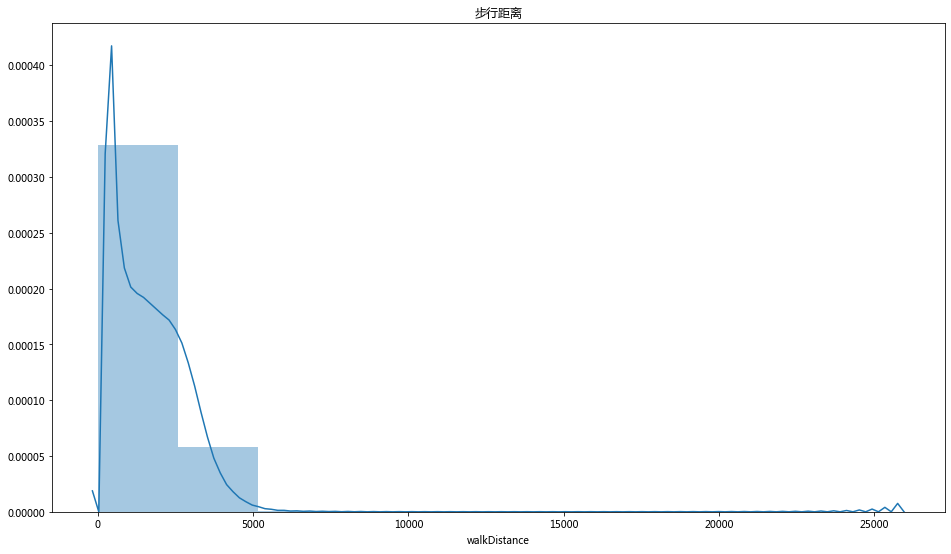

In [30]:
## 步行距离分布
plt.figure(figsize = (16,9))
sns.distplot(train['walkDistance'],bins =10)
plt.title('步行距离')
plt.show()

In [31]:
## 步行距离超过10km的异常用户查询
display(train[train['walkDistance']>=10000].shape)
train[train['walkDistance']>=10000].head(10)

(219, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killNorm,maxPlaceNorm,matchDurationNorm,damageDealtNorm,healandboosts,totalDistance,killWithoutMoving,headshot_rate
23026,8a6562381dd83f,23e638cd6eaf77,b0a804a610e9b0,0,1,0.00,0,0,0,44,...,0.8163,99,0.00,99.99,1925.06,0.0000,1,13540.3032,False,0.0
34344,5a591ecc957393,6717370b51c247,a15d93e7165b05,0,3,23.22,0,0,1,34,...,0.9474,65,0.00,27.00,2668.95,31.3470,4,10070.9073,False,0.0
49312,582685f487f0b4,338112cd12f1e7,d0afbf5c3a6dc9,0,4,117.20,1,0,1,24,...,0.9130,94,1.06,49.82,2323.52,124.2320,5,12446.7588,False,0.0
68590,8c0d9dd0b4463c,c963553dc937e9,926681ea721a47,0,1,32.34,0,0,1,46,...,0.8333,96,0.00,50.96,1909.44,33.6336,2,12483.6200,False,0.0
94400,d441bebd01db61,7e179b3366adb8,923b57b8b834cc,1,1,73.08,0,0,3,27,...,0.8194,73,0.00,92.71,2293.62,92.8116,4,11490.6300,False,0.0
125103,db5a0cdc969dcb,50cc466757950e,c306a9745c4c1d,0,4,37.73,0,0,7,47,...,0.7340,95,0.00,99.75,2054.85,39.6165,11,12828.7978,False,0.0
136421,955e60b09a96b1,30df08fe22a901,8669d01725f135,0,1,0.00,0,0,1,46,...,0.6957,94,0.00,49.82,2091.38,0.0000,2,12223.8100,False,0.0
136476,0d75d05b5c988c,3da040ce77cd0b,65bc5211a569dd,0,3,0.00,0,0,0,41,...,0.9333,91,0.00,99.19,2028.49,0.0000,3,14918.2000,False,0.0
154080,7e8a71d23381cd,e2c9f4f92840b2,a721de1aa05408,0,3,0.00,0,0,13,46,...,0.8602,94,0.00,99.64,2038.38,0.0000,16,12636.7000,False,0.0
154128,32fdde4c716787,390ae9a51c11b8,82610ed1b4d033,0,4,52.16,0,0,7,25,...,0.8936,95,1.05,50.40,1927.80,54.7680,11,10889.8614,False,0.0


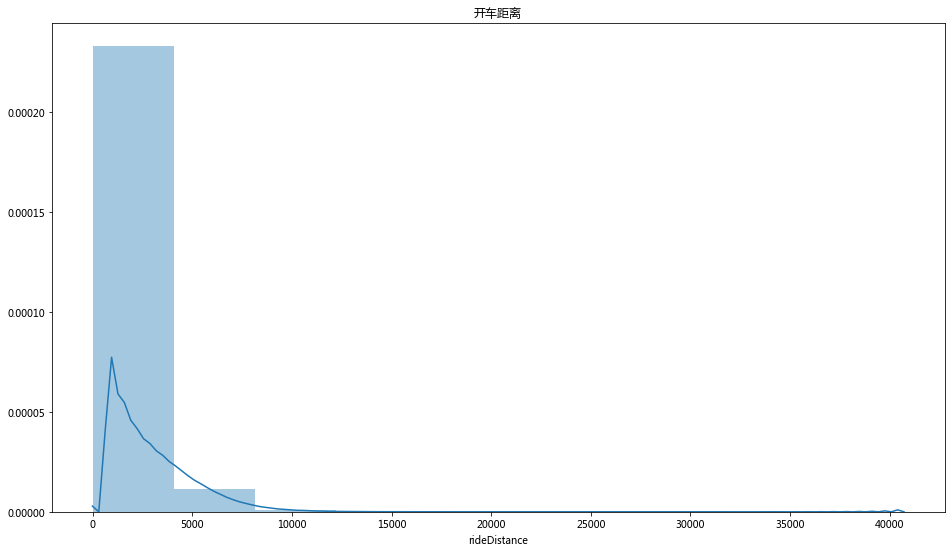

In [32]:
## 开车距离分布
plt.figure(figsize = (16,9))
sns.distplot(train['rideDistance'],bins =10)
plt.title('开车距离')
plt.show()

In [33]:
## 开车距离超过20km的异常用户查询
display(train[train['rideDistance']>=20000].shape)
train[train['rideDistance']>=20000].head(10)

(150, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killNorm,maxPlaceNorm,matchDurationNorm,damageDealtNorm,healandboosts,totalDistance,killWithoutMoving,headshot_rate
28588,6260f7c49dc16f,b24589f02eedd7,6ebea3b4f55b4a,0,0,99.20,0,0,1,30,...,0.6421,96,1.04,99.84,1969.76,103.1680,1,26306.60,False,0.000000
63015,adb7dae4d0c10a,8ede98a241f30a,8b36eac66378e4,0,0,0.00,0,0,0,55,...,0.5376,94,0.00,99.64,2004.46,0.0000,0,22065.40,False,0.000000
70507,ca6fa339064d67,f7bb2e30c3461f,3bfd8d66edbeff,0,0,100.00,0,0,0,26,...,0.8878,99,1.01,99.99,1947.28,101.0000,0,28917.50,False,0.000000
72763,198e5894e68ff4,ccf47c82abb11f,d92bf8e696b61d,0,0,0.00,0,0,0,46,...,0.7917,97,0.00,99.91,1861.21,0.0000,0,21197.20,False,0.000000
95276,c3fabfce7589ae,15529e25aa4a74,d055504340e5f4,0,7,778.20,0,1,2,2,...,0.9785,94,7.42,99.64,1986.44,824.8920,9,26733.20,False,0.142857
140097,9944fbbea2b91e,18b4d5f4bb1906,d9d4a3e50cae75,1,0,12.55,0,0,0,53,...,0.5000,89,0.00,98.79,2107.89,13.9305,0,21293.23,False,0.000000
297186,88904c200175b6,012a61a01e146e,7a270c25e9b70c,0,1,0.00,0,0,1,47,...,0.7447,96,0.00,49.92,1995.76,0.0000,2,29267.30,False,0.000000
371098,f7071357f6b762,f3ee20821f4627,ac47c86bf385bf,0,0,72.92,1,0,0,45,...,0.6875,96,0.00,50.96,1953.12,75.8368,0,21942.10,False,0.000000
403647,c65da7b3fceef5,814d1b3736e276,ff9f570b555d48,0,2,0.00,0,0,3,54,...,0.6739,94,0.00,49.82,1930.26,0.0000,5,21198.20,False,0.000000
426708,149e224a2330ae,6d8cb80b3de8ff,f8b8e2643f60ee,0,2,0.00,0,0,2,43,...,0.8171,83,0.00,97.11,2348.19,0.0000,4,32362.10,False,0.000000


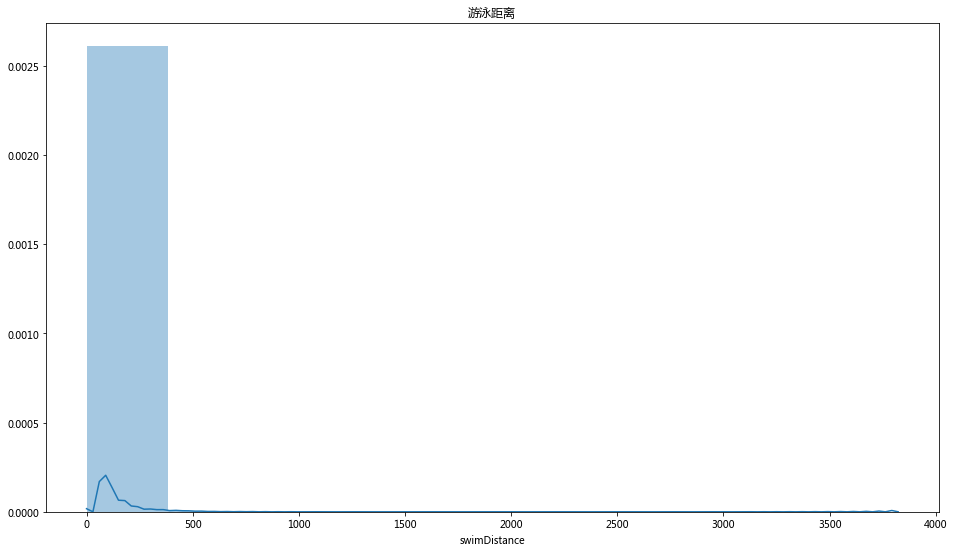

In [34]:
## 游泳距离分布
plt.figure(figsize = (16,9))
sns.distplot(train['swimDistance'],bins =10)
plt.title('游泳距离')
plt.show()

In [35]:
## 游泳距离超过2km的异常用户查询
display(train[train['swimDistance']>=2000].shape)
train[train['swimDistance']>=2000].head(10)

(12, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killNorm,maxPlaceNorm,matchDurationNorm,damageDealtNorm,healandboosts,totalDistance,killWithoutMoving,headshot_rate
177973,c2e9e5631f4e54,23213058f83abe,f01eb1073ef377,0,5,78.12,1,0,1,47,...,0.9592,98,0.00,51.00,1426.98,79.6824,6,3297.000,False,0.000000
274258,ba5e3dfb5a0fa0,383db055216ec2,d6e13468e28ab4,0,4,53.32,0,0,16,39,...,0.9600,94,0.00,27.56,2319.28,56.5192,20,10113.000,False,0.000000
1005337,d50c9d0e65fe2a,4996575c11abcb,668402592429f8,0,1,503.00,4,3,1,6,...,1.0000,88,3.36,29.12,2124.64,563.3600,2,10740.000,False,1.000000
1195818,f811de9de80b70,d08ddf7beb6252,8a48703ab52ec8,0,7,352.30,3,1,6,4,...,1.0000,98,5.10,49.98,1423.92,359.3460,13,3083.100,False,0.200000
1227362,a33e917875c80e,5b72674b42712b,5fb0d8b1fc16cf,0,1,589.20,3,1,1,46,...,1.0000,86,2.28,13.68,1163.94,671.6880,2,4818.300,False,0.500000
1889163,bd8cc3083a9923,1d5d17140d6fa4,8e2e6022d6e5c8,0,0,0.00,0,0,0,47,...,0.5833,87,0.00,28.25,1567.31,0.0000,0,5314.000,False,0.000000
2065940,312ccbb27b99aa,47c7f4d69e2fb1,b4b11756321f3a,1,3,49.59,0,0,5,48,...,0.8511,96,0.00,49.92,1434.16,51.5736,8,9899.000,False,0.000000
2327586,8773d0687c6aae,b17f46f9f6666c,56ee5897512c86,3,1,474.40,2,0,0,7,...,1.0000,91,3.27,29.43,1318.90,517.0960,1,2394.546,False,0.000000
2784855,a8653b87e83892,383db055216ec2,d6e13468e28ab4,1,4,843.80,5,5,2,2,...,0.9600,94,7.42,27.56,2319.28,894.4280,6,9926.000,False,0.714286
3359439,3713b36e1ba9e1,1f7aed9240864a,584447ed875c85,0,0,0.00,0,0,0,77,...,0.2143,96,0.00,30.16,1426.88,0.0000,0,4088.000,False,0.000000


In [36]:
## 划水的用户
train.drop(train[train['swimDistance']>=2000].index,inplace = True)

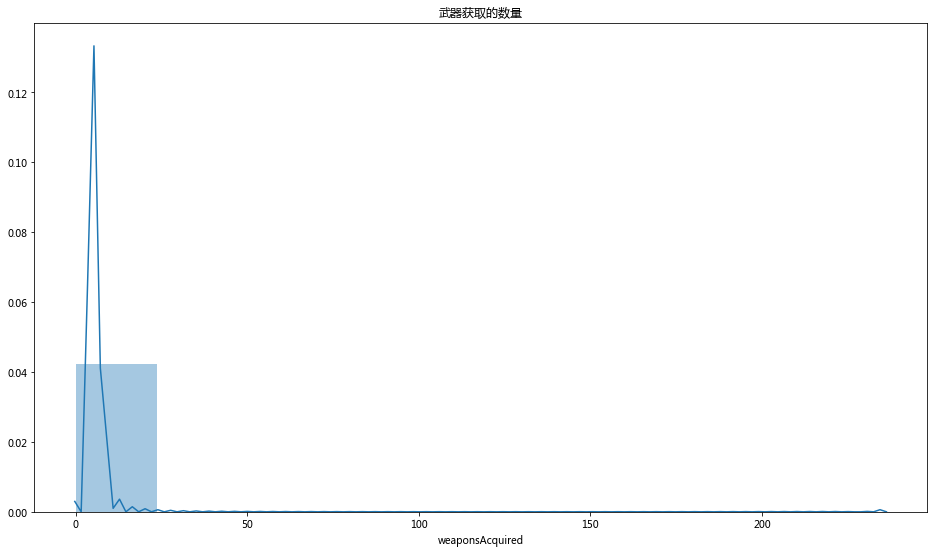

In [37]:
## 继续分析武器，拿到武器的数量分布
plt.figure(figsize = (16,9))
sns.distplot(train['weaponsAcquired'],bins =10)
plt.title('武器获取的数量')
plt.show()

In [38]:
## 捡武器超过80的数量
display(train[train['weaponsAcquired']>=80].shape)
train[train['weaponsAcquired']>=80].head(10)

(19, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killNorm,maxPlaceNorm,matchDurationNorm,damageDealtNorm,healandboosts,totalDistance,killWithoutMoving,headshot_rate
233643,7c8c83f5f97d0f,b33b210a52a2f8,2e8a0917a71c43,0,0,67.11,0,0,0,44,...,0.7111,91,0.00,50.14,2072.09,73.1499,0,3187.00,False,0.000000
588387,c58e3e0c2ba678,3d3e6100c07ff0,d04dbb98249f76,0,1,175.30,1,0,2,48,...,0.7500,98,0.00,29.58,1399.44,178.8060,3,1687.00,False,0.000000
1437471,8f0c855d23e4cd,679c3316056de8,fbaf1b3ae1d884,1,0,100.00,0,0,0,24,...,0.8929,97,1.03,29.87,1895.20,103.0000,0,5299.21,False,0.000000
1449293,db54cf45b9ed1c,898fccaeeb041d,484b4ae51fe80f,0,0,0.00,0,0,0,54,...,0.5600,80,0.00,31.20,1596.00,0.0000,0,653.10,False,0.000000
1592744,634a224c53444e,75fa7591d1538c,f900de1ec39fa5,9,0,1726.00,0,3,0,9,...,0.2000,11,43.47,20.79,3398.22,3262.1400,0,2888.80,False,0.130435
1834515,e927e9020f7e0d,60d6b714a7308f,8e265af296007b,1,1,26.46,0,0,1,51,...,0.9200,95,0.00,27.30,1502.55,27.7830,2,2835.00,False,0.000000
2373240,a8c150d5d3d3e2,6e1c8c5f91e060,f900de1ec39fa5,12,0,1746.00,0,1,1,11,...,0.0000,11,30.24,20.79,3398.22,3299.9400,1,275.90,False,0.062500
2442962,438cabaa5dfbdd,596c155c524725,8e0bbeec19a929,0,0,0.00,0,0,0,56,...,0.5000,91,0.00,29.43,1278.57,0.0000,0,807.60,False,0.000000
2743408,afcb46681b909f,3715298b7eea9c,4dd4d42772464f,0,4,186.90,2,0,2,18,...,0.7955,90,2.20,49.50,1662.10,205.5900,6,3318.00,False,0.000000
2749693,940b52bf12805a,4757d102ca4fbf,7ecae2cedc064f,1,3,378.90,2,0,5,7,...,0.8846,98,3.06,27.54,1428.00,386.4780,8,3641.70,False,0.000000


In [39]:
## 可疑的用户去除
train.drop(train[train['weaponsAcquired']>=80].index,inplace = True)

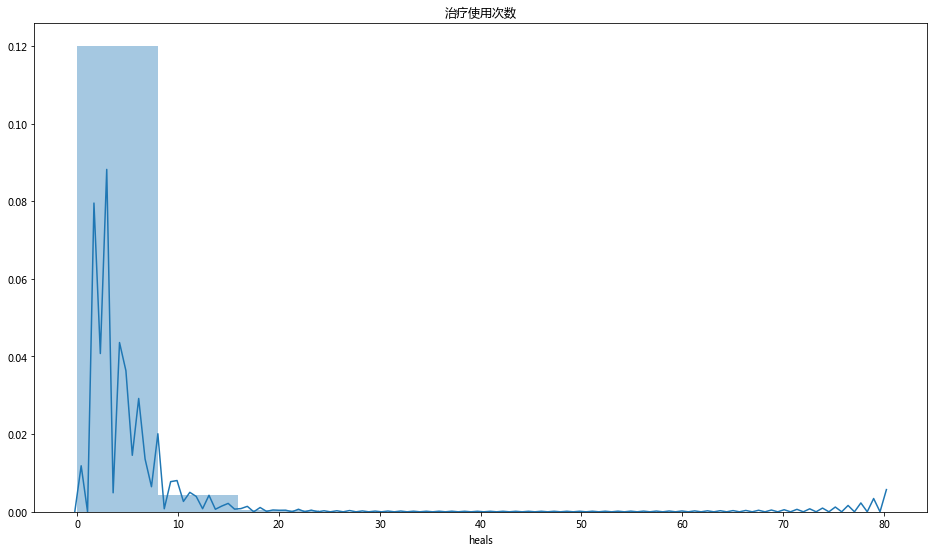

In [40]:
## 分析治疗
plt.figure(figsize = (16,9))
sns.distplot(train['heals'],bins =10)
plt.title('治疗使用次数')
plt.show()

In [41]:
## 治疗超过40次的用户 - 长尾用户
display(train[train['heals']>=40].shape)
train[train['heals']>=40].head(10)

(135, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killNorm,maxPlaceNorm,matchDurationNorm,damageDealtNorm,healandboosts,totalDistance,killWithoutMoving,headshot_rate
18405,63ab976895d860,927eeba5614c4f,69473402649f11,0,2,0.0,0,0,47,43,...,0.9368,96,0.00,99.84,1868.88,0.00,49,6854.000,False,0.000000
54463,069ddee7c9d26a,58ab5a1ce8e06f,942416b6caf21e,1,4,182.0,0,1,43,21,...,0.9615,93,1.07,28.89,1639.24,194.74,47,3083.400,False,1.000000
126439,c45bd6917146e2,81ab9f863957cb,4335664c6716fa,0,2,0.0,0,0,52,49,...,0.8333,97,0.00,99.91,1415.22,0.00,54,1343.443,False,0.000000
259351,86910c38335c2f,2738398928d28c,7d2911e944bfaa,0,10,0.0,0,0,42,45,...,0.8646,97,0.00,99.91,1822.07,0.00,52,7444.000,False,0.000000
268747,a007734fbc6ebf,5bf702dfa1e5d4,ad6b5669d33a2c,0,5,0.0,0,0,48,43,...,0.8370,93,0.00,99.51,2009.46,0.00,53,5816.000,False,0.000000
269098,a0891dbc2950ea,dde848d90491ba,b4fd3348551b73,0,2,0.0,0,0,42,44,...,0.9259,97,0.00,28.84,1333.85,0.00,44,2439.000,False,0.000000
284195,91a2fb00455eb3,f639b09774c5b1,65b73c71653822,0,3,123.0,0,0,40,52,...,0.8276,99,0.00,30.30,1984.65,124.23,43,4848.000,False,0.000000
300204,1f4f2efc86bfcb,3d668492d1fca9,d3638466a43d38,0,6,175.0,2,1,47,25,...,0.9355,95,1.05,33.60,1425.90,183.75,53,3415.600,False,1.000000
349908,7725ad71ad2ff7,4b2a7cf86d1546,cfa2775c9ef944,3,0,2348.0,0,8,41,9,...,0.8889,41,42.93,58.83,2857.23,3733.32,41,268.800,False,0.296296
375156,d64866c78ebcb0,aa0f089ae6430c,4dbc4ebba33ec6,0,7,278.5,3,1,44,3,...,0.9630,94,4.24,29.68,1915.42,295.21,51,4927.000,False,0.250000


In [42]:
## 可疑的用户去除
train.drop(train[train['heals']>=40].index,inplace = True)

In [43]:
## 世界清静了很多，大部分的异常用户被剔除了
train.shape

(4349313, 38)

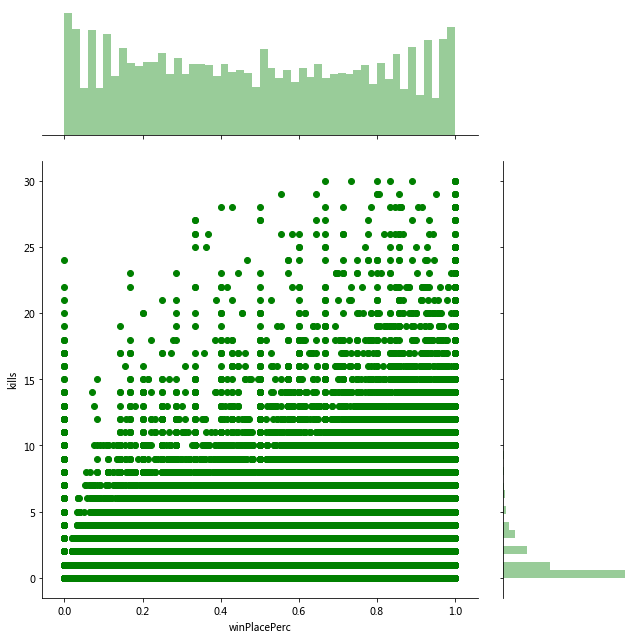

In [44]:
## 探索内在的关系
# 胜率与kills数量的关系
sns.jointplot(x = 'winPlacePerc',y='kills',data = train,height =9,ratio =3,color = 'g')
plt.show()

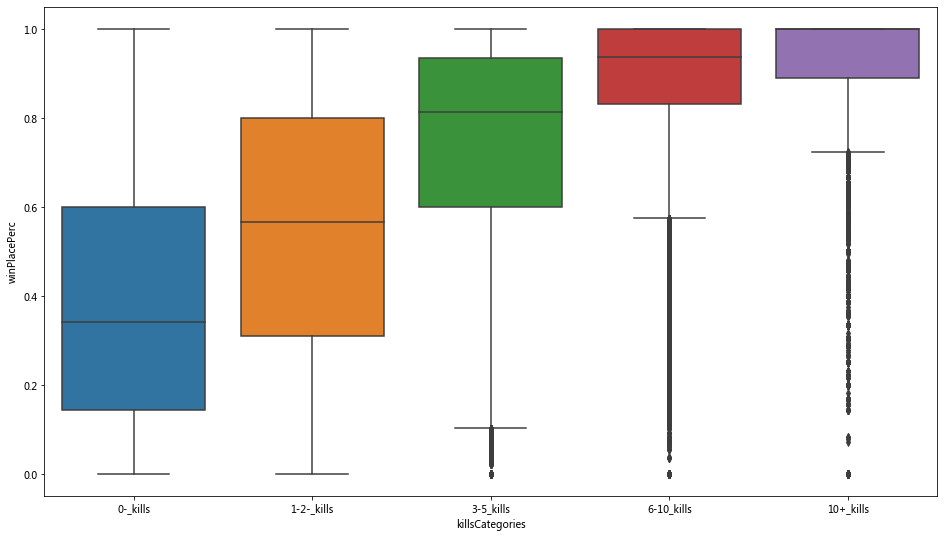

In [45]:
## 分析杀敌数量的分布与胜率的关系
kills = train.copy()
kills['killsCategories'] = pd.cut(kills['kills'],[-1,0,2,5,10,30],labels= ['0-_kills','1-2-_kills','3-5_kills','6-10_kills','10+_kills'])
plt.figure(figsize=(16,9))
sns.boxplot(x='killsCategories',y = 'winPlacePerc',data= kills)
plt.show()

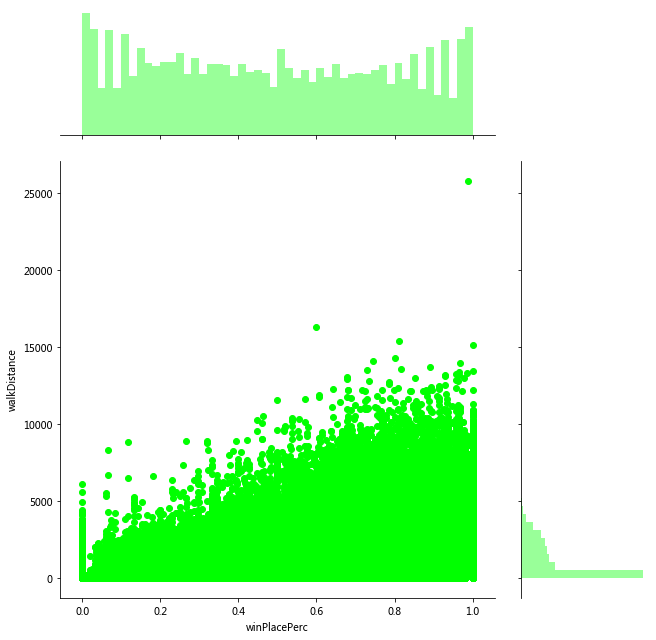

In [46]:
## 分析跑毒的分布与胜率的关系
sns.jointplot(x = 'winPlacePerc',y='walkDistance',data = train,height =9,ratio =3,color = 'lime')
plt.show()

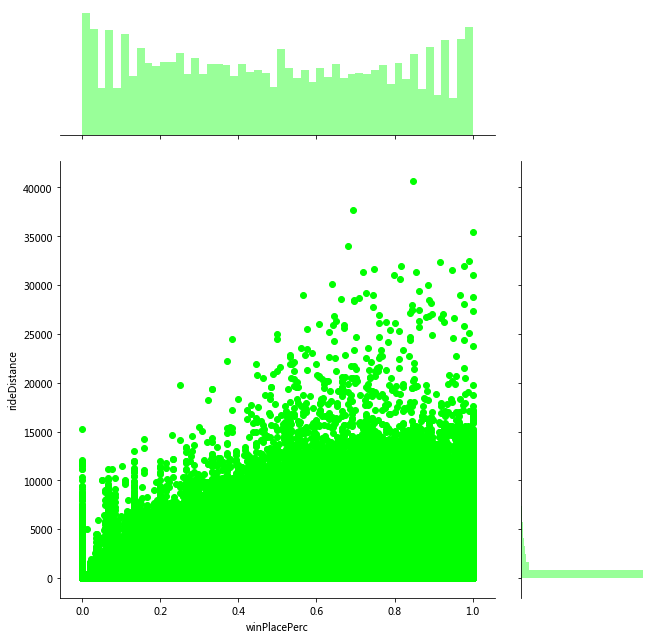

In [47]:
## 分析开车的分布与胜率的关系
sns.jointplot(x = 'winPlacePerc',y='rideDistance',data = train,height =9,ratio =3,color = 'lime')
plt.show()

In [ ]:
## 查看地图的信息
plt.figure(figsize = (16,9))
sns.distplot(train['matchDuration'],bins =10)
plt.title('游戏时长')
plt.show()

## 分析结果，有两张地图

In [ ]:
## 图中有两张地图，分别呈现两张地图的时长分布
fig,ax = plt.subplot(1,2,figsize=(16.9))
train['matchDuration'].hist(bins=50,ax =ax[0])
train.query('matchDuration >= 1400 & matchDuration <=1800')['matchDuration'].hist(bins = 50,axx = ax[1])

In [49]:
#matchType 用于随机森林模型
train['matchType'].nunique()

16

In [50]:
#get_dummies 是利用pandas实现one hot encode的方式。详细参数请查看官方文档
#pandas.get_dummies(data, prefix=None, prefix_sep=’_’, dummy_na=False, columns=None, sparse=False, drop_first=False)[source]
#matchtype one hot encode
train = pd.get_dummies(train,columns=['matchType'])
matchType_encoding = train.filter(regex = 'matchType')
matchType_encoding.head()


,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [51]:
## 将groupID 和MatchID 转为绝对类型
train['groupId']=train['groupId'].astype('category')
train['matchId']=train['matchId'].astype('category')

## category coding 
train['groupId_cat'] = train['groupId'].cat.codes
train['matchId_cat'] = train['matchId'].cat.codes

##groupId,matchID 删除
train.drop(columns = ['groupId','matchId'],inplace = True)

## 查看
train[['groupId_cat','matchId_cat']].head()

,groupId_cat,matchId_cat
0,609234,29996
1,821691,32654
2,837257,3131
3,1330555,45133
4,1744854,20468


In [52]:
## 学习前的准备工作
##取样数量
train.drop(columns = ['Id'],inplace = True)
##取样数量
sample = 500000
df_sample = train.sample(sample)
## 分离目标列,生成比较列
df = df_sample.drop(columns = ['winPlacePerc'])
y = df_sample['winPlacePerc']


In [53]:
'''
##分离训练数据和验证数据集
def split_vals(a,n:int):
    return a[:n].copy(),a[n:].copy()
val_perc = 0.12 # 12:88
n_valid = int(val_perc*sample)
n_trn = len(df)-n_valid

##分离数据集
raw_train,raw_valid = split_vals(df_sample,n_trn)
X_train,X_valid = split_vals(df,n_trn)
y_train,y_valid = split_vals(y,n_trn)

## 验证取样数据
print('训练样本Shape:',X_train.shape,
      '目标样本Shape:',y_train.shape,
     '校验样本Shape:',X_valid.shape,)
'''

"\n##分离训练数据和验证数据集\ndef split_vals(a,n:int):\n    return a[:n].copy(),a[n:].copy()\nval_perc = 0.12 # 12:88\nn_valid = int(val_perc*sample)\nn_trn = len(df)-n_valid\n\n##分离数据集\nraw_train,raw_valid = split_vals(df_sample,n_trn)\nX_train,X_valid = split_vals(df,n_trn)\ny_train,y_valid = split_vals(y,n_trn)\n\n## 验证取样数据\nprint('训练样本Shape:',X_train.shape,\n      '目标样本Shape:',y_train.shape,\n     '校验样本Shape:',X_valid.shape,)\n"

In [54]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid = train_test_split(df,y,random_state =1)


In [55]:
X_train.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,groupId_cat,matchId_cat
3788884,0,0,0.00,0,0,0,68,0,0,0,...,0,0,0,0,0,0,1,0,1105211,33158
1471421,0,2,275.40,2,0,1,12,0,2,1,...,0,0,0,0,0,0,0,1,1595921,29335
1849427,0,0,41.19,0,0,0,93,1102,0,0,...,0,0,0,0,0,0,0,1,924444,7253
1059309,0,0,0.00,0,0,0,74,0,0,0,...,0,0,0,0,0,0,1,0,1460360,3158
171206,0,0,179.00,0,0,5,59,0,0,0,...,0,0,0,0,0,0,0,1,1574911,26871


In [56]:
y_train.head()

3788884    0.2609
1471421    1.0000
1849427    0.0714
1059309    0.1852
171206     0.5357
Name: winPlacePerc, dtype: float64

In [57]:
##设定MAE指标

from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## 打印MAE分数的函数
def print_score(m:RandomForestRegressor):
    res = ['mae train:',mean_absolute_error(m.predict(X_train),y_train),
          'mae val:',mean_absolute_error(m.predict(X_valid),y_valid)]
    if hasattr(m,'oob_score_'):res.append(m.oob_score_)
    print(res)

In [58]:
#训练基础模型
#B. n_estimators：
#在利用最大投票数或平均值来预测之前，你想要建立子树的数量。 较多的子树可以让模型有更好的性能，但同时让你的代码变慢。 你应该选择尽可能高的值，只要你的处理器能够承受的住，因为这使你的预测更好更稳定。
#min_sample_leaf：
#如果您以前编写过一个决策树，你能体会到最小样本叶片大小的重要性。 叶是决策树的末端节点。 较小的叶子使模型更容易捕捉训练数据中的噪声。 一般来说，我更偏向于将最小叶子节点数目设置为大于50。在你自己的情况中，你应该尽量尝试多种叶子大小种类，以找到最优的那个。
#max_features：
#随机森林允许单个决策树使用特征的最大数量。 Python为最大特征数提供了多个可选项。 下面是其中的几个：
#Auto/None ：简单地选取所有特征，每颗树都可以利用他们。这种情况下，每颗树都没有任何的限制。
#sqrt ：此选项是每颗子树可以利用总特征数的平方根个。 例如，如果变量（特征）的总数是100，所以每颗子树只能取其中的10个。“log2”是另一种相似类型的选项。
#0.2：此选项允许每个随机森林的子树可以利用变量（特征）数的20％。如果想考察的特征x％的作用， 我们可以使用“0.X”的格式。
#n_jobs：
#这个参数告诉引擎有多少处理器是它可以使用。 “-1”意味着没有限制，而“1”值意味着它只能使用一个处理器。 下面是一个用Python做的简单实验用来检查这个指标：
from sklearn.metrics import mean_absolute_error

m1 = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt',n_jobs= -1)
m1.fit(X_train, y_train)
print_score(m1)

['mae train:', 0.0395366395639562, 'mae val:', 0.06371382841553579]


In [59]:
#RF 中特别重要的一个参数是 Feature Importance，这个参数可以告诉我们在所有的 model feature 里面，哪些对于最终的结果比较重要，类似与 PCA 的分析结果。
## killPlace 和totalDistance 比较重要
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_} ).sort_values('imp', ascending=False)
fi = rf_feat_importance(m1,df)
fi[0:10]

,cols,imp
21,walkDistance,0.212588
6,killPlace,0.204347
30,totalDistance,0.172048
1,boosts,0.079285
22,weaponsAcquired,0.048590
29,healandboosts,0.047548
5,heals,0.034535
28,damageDealtNorm,0.021537
16,rideDistance,0.020612
2,damageDealt,0.019360


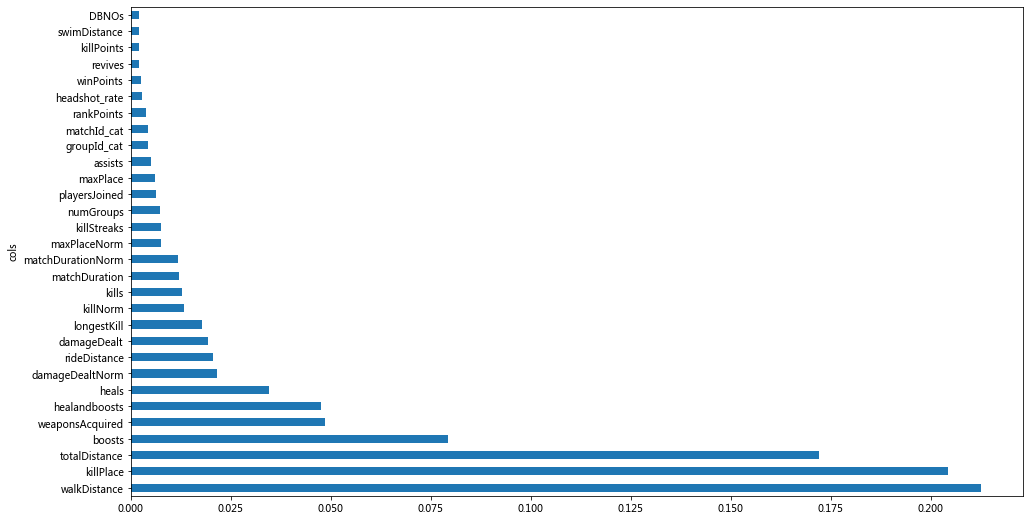

In [60]:
## 柱状图
plot1 = fi[0:30].plot('cols','imp',figsize = (16,9),legend = False,kind = 'barh',)
plot1

In [61]:
## 保留比较重要的列
to_keep = fi[fi.imp > 0.005].cols
print(len(to_keep))

21


In [62]:
## 只保留重要的的列，继续进一步的分析
df_keep = df[to_keep].copy()
X_train,X_valid = train_test_split(df_keep,random_state =1) 

In [63]:
'''
train_test_split函数用于将矩阵随机划分为训练子集和测试子集，并返回划分好的训练集测试集样本和训练集测试集标签。

格式：

X_train,X_test, y_train, y_test =cross_validation.train_test_split(train_data,train_target,test_size=0.3, random_state=0)

 

参数解释：

train_data：被划分的样本特征集

train_target：被划分的样本标签

test_size：如果是浮点数，在0-1之间，表示样本占比；如果是整数的话就是样本的数量

random_state：是随机数的种子。

随机数种子：其实就是该组随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。比如你每次都填1，其他参数一样的情况下你得到的随机数组是一样的。但填0或不填，每次都会不一样。

随机数的产生取决于种子，随机数和种子之间的关系遵从以下两个规则：

种子不同，产生不同的随机数；种子相同，即使实例不同也产生相同的随机数。
'''

'\ntrain_test_split函数用于将矩阵随机划分为训练子集和测试子集，并返回划分好的训练集测试集样本和训练集测试集标签。\n\n格式：\n\nX_train,X_test, y_train, y_test =cross_validation.train_test_split(train_data,train_target,test_size=0.3, random_state=0)\n\n \n\n参数解释：\n\ntrain_data：被划分的样本特征集\n\ntrain_target：被划分的样本标签\n\ntest_size：如果是浮点数，在0-1之间，表示样本占比；如果是整数的话就是样本的数量\n\nrandom_state：是随机数的种子。\n\n随机数种子：其实就是该组随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。比如你每次都填1，其他参数一样的情况下你得到的随机数组是一样的。但填0或不填，每次都会不一样。\n\n随机数的产生取决于种子，随机数和种子之间的关系遵从以下两个规则：\n\n种子不同，产生不同的随机数；种子相同，即使实例不同也产生相同的随机数。\n'

In [64]:
## 进行第二次的随机森林模型
m2 = RandomForestRegressor(n_estimators=80, min_samples_leaf=3, max_features='sqrt',n_jobs= -1)
m2.fit(X_train, y_train)
print_score(m2)

['mae train:', 0.03805673103066314, 'mae val:', 0.061597242935140725]


['mae train:', 0.03249919407609068, 'mae val:', 0.059071351989255616]


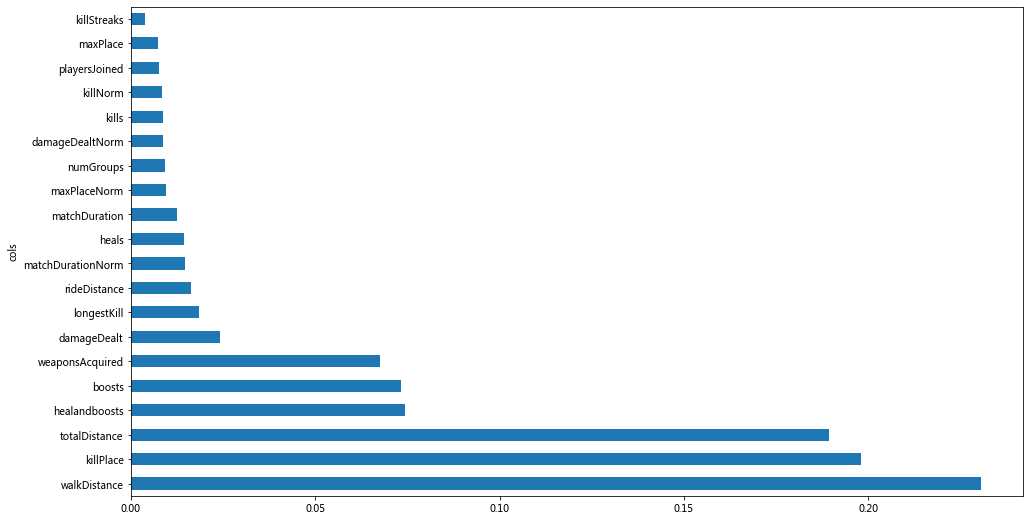

In [65]:
## 查看第二次的随机森林重要参数
fi_to_keep = rf_feat_importance(m2,df_keep)
plot2 = fi_to_keep[0:20].plot('cols','imp',figsize = (16,9),legend = False,kind = 'barh',)
plot2

[]

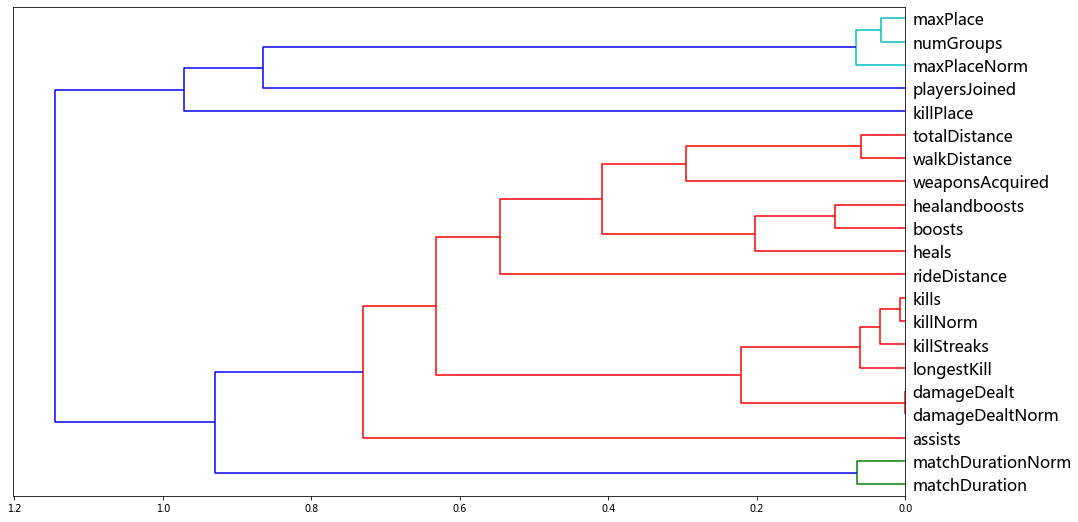

In [66]:
## 查看树形相关性结构
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(df_keep).correlation,4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed,method = 'average')
fig = plt.figure(figsize=(16,9))
dendrogram = hc.dendrogram(z,labels = df_keep.columns,orientation = 'left',leaf_font_size = 16)
plt.plot()

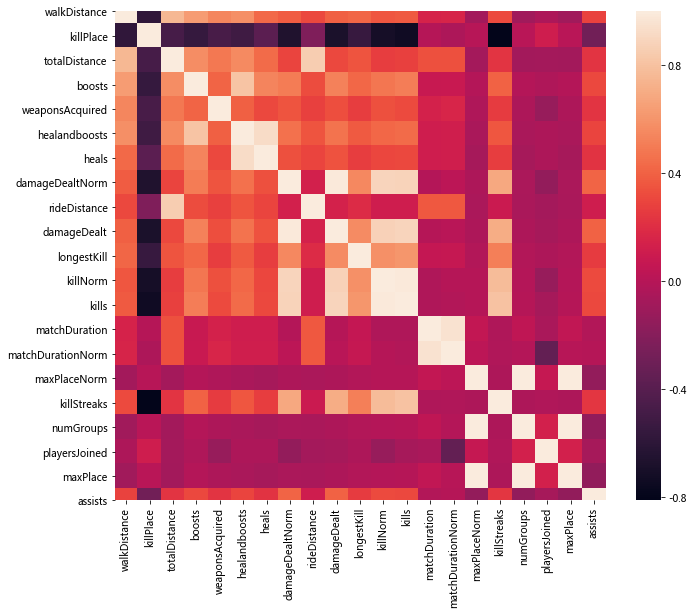

In [67]:
# Correlation heatmap
corr = df_keep.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Create heatmap
heatmap = sns.heatmap(corr)

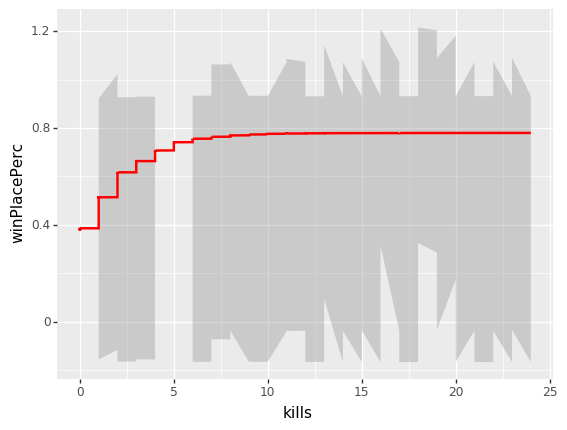

<ggplot: (8770071522157)>

In [74]:
## 预测杀戮人数与胜率的关系
from plotnine import *
sample = 100000
x_all = train.sample(sample)
ggplot(x_all, aes('kills','winPlacePerc'))+stat_smooth(se=True, colour='red', method='mavg')

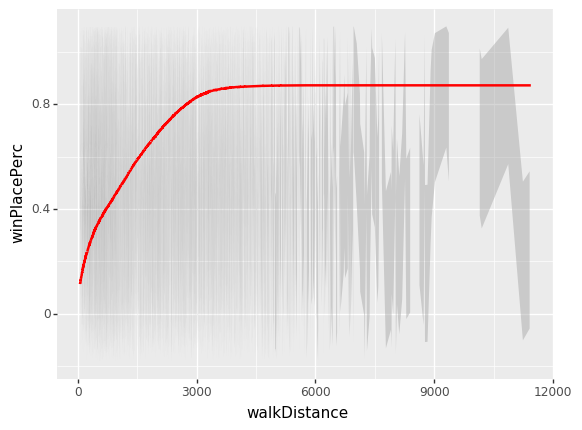

<ggplot: (8770015332645)>

In [75]:
## 预测步行距离与胜率的关系
sample = 100000
x_all = train.sample(sample)
ggplot(x_all, aes('walkDistance','winPlacePerc'))+stat_smooth(se=True, colour='red', method='mavg')

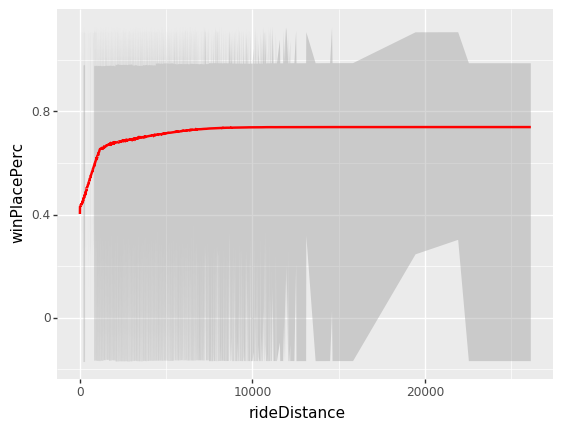

<ggplot: (8770068201769)>

In [76]:
## 预测步行距离与胜率的关系
sample = 100000
x_all = train.sample(sample)
ggplot(x_all, aes('rideDistance','winPlacePerc'))+stat_smooth(se=True, colour='red', method='mavg')

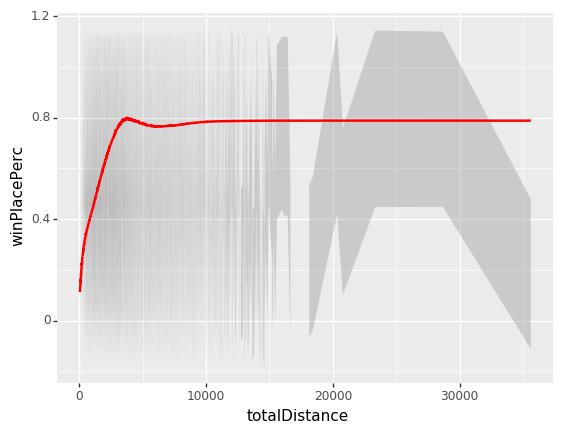

<ggplot: (8770038795757)>

In [78]:
## 预测步行距离与胜率的关系
sample = 100000
x_all = train.sample(sample)
ggplot(x_all, aes('totalDistance','winPlacePerc'))+stat_smooth(se=True, colour='red', method='mavg')

In [80]:
X_train,X_valid,y_train,y_valid = train_test_split(df,y,test_size=0.12,random_state =1)
## 进行第3次的随机森林模型
m3 = RandomForestRegressor(n_estimators=70, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1)
m3.fit(X_train, y_train)
print_score(m3)

['mae train:', 0.03042635093074253, 'mae val:', 0.05849298094987372]
